# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Adelia Marsa Karunika]
- **Email:** [adeliamarsak@gmail.com]
- **ID Dicoding:** [adeliamarsak]

## Menentukan Pertanyaan Bisnis

- Apa faktor utama yang memengaruhi jumlah sepeda yang dipinjam setiap hari?
- Bagaimana pola peminjaman sepeda berdasarkan waktu (jam, hari, atau musim)?

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install numpy pandas scipy matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

## Data Wrangling

### Gathering Data

####Tabel Data Day

In [26]:
day_df = pd.read_csv("https://raw.githubusercontent.com/adeliamarsak/bikesharingdataset/refs/heads/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Berikut menunjukkan data tentang persewaan sepeda berdasarkan hari yang terdiri dari beberapa kolom, seperti:

instant: Indeks baris.

dteday: Tanggal.

season: Musim (1 untuk musim semi, 2 untuk musim panas, dst.).

yr: Tahun (0 untuk 2011, 1 untuk 2012).

mnth: Bulan.

holiday: Hari libur (0 bukan libur, 1 libur).

weekday: Hari dalam minggu.

workingday: Hari kerja (0 bukan hari kerja, 1 hari kerja).

weathersit: Kondisi cuaca (1 cerah, 2 mendung, dll.).

temp: Suhu normalisasi.

atemp: Suhu yang dirasakan.

hum: Kelembapan.

windspeed: Kecepatan angin.

casual: Jumlah peminjam tidak terdaftar.

registered: Jumlah peminjam terdaftar.

cnt: Total peminjaman.


####Tabel Data Hour

In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/adeliamarsak/bikesharingdataset/refs/heads/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Berikut menunjukkan data tentang persewaan sepeda berdasarkan jam yang terdiri dari beberapa kolom, seperti:

instant: Indeks baris.

dteday: Tanggal.

season: Musim (1 untuk musim semi, 2 untuk musim panas, dst.).

yr: Tahun (0 untuk 2011, 1 untuk 2012).

mnth: Bulan.

holiday: Hari libur (0 bukan libur, 1 libur).

weekday: Hari dalam minggu.

workingday: Hari kerja (0 bukan hari kerja, 1 hari kerja).

weathersit: Kondisi cuaca (1 cerah, 2 mendung, dll.).

temp: Suhu normalisasi.

atemp: Suhu yang dirasakan.

hum: Kelembapan.

windspeed: Kecepatan angin.

casual: Jumlah peminjam tidak terdaftar.

registered: Jumlah peminjam terdaftar.

cnt: Total peminjaman.


###Assesing Data

####Menilai Data Day

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


- Jumlah total datanya adalah 731, tidak ada missing values.
- Kolom dteday seharusnya datetime

In [5]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- Tidak ada data yang terduplikasi

####Menilai Data Hour

In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- Jumlah data adalah 17379, tidak ada missing values
- kolom dteday seharusnya bertipe datetime

In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- Tidak ada data yang terduplikasi

###Cleaning Data

**Mengubah tipe data kolom dteday menjadi date time**

In [8]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
  day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [9]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])
  hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

##Explorasi Data Analysis


####Explore Data Day

In [10]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Berdasarkan statistik deskriptif dari tabel yang ditampilkan, berikut adalah analisis awal data:

Suhu berkisar antara 0.059 hingga 0.655 (kemungkinan dinormalisasi).

Median (50%) adalah 0.498, menunjukkan distribusi yang cukup simetris.
atemp (feels like temperature): Mirip dengan suhu aktual, tetapi sedikit lebih tinggi.

Median adalah 0.486, menunjukkan perasaan suhu sering kali sedikit lebih rendah dari nilai rata-rata temp.

Kelembaban berkisar antara 0.0 hingga 0.87, dengan median 0.626. Ada kemungkinan hari-hari dengan kelembaban sangat rendah (0.0).

Kecepatan angin: Berkisar dari 0.02 hingga 0.5 dengan median 0.18. Angka ini menunjukkan kecepatan angin rata-rata tergolong rendah.

Season (musim): Median = 3, menunjukkan musim 3 mungkin sering terjadi (musim panas).

Workingday: Rata-rata 0.683, berarti mayoritas hari dalam dataset adalah hari kerja.

Weathersit (situasi cuaca): Median = 1, menunjukkan bahwa sebagian besar data berasal dari hari dengan cuaca baik.

Casual: Rata-rata adalah 848, dengan nilai minimum 2 dan maksimum 1096. Artinya, terdapat variasi besar dalam jumlah pengguna sepeda non-terdaftar per hari.

Registered: Nilai rata-rata lebih tinggi (3656) dibandingkan dengan casual, menunjukkan bahwa sebagian besar pengguna adalah pelanggan terdaftar.

Cnt (total peminjaman): Rata-rata 4504, minimum 22, dan maksimum 5956. Distribusi ini menunjukkan bahwa sebagian besar hari memiliki tingkat peminjaman yang moderat hingga tinggi.

Hubungan antara season, workingday, dan weathersit terhadap jumlah peminjaman sepeda dapat dianalisis.

In [11]:
agg_data = day_df.groupby(by="season").agg({
    "temp": ["mean", "min", "max", "std"],
    "hum": ["mean", "min", "max", "std"],
    "cnt": ["mean", "min", "max", "std"]
})

# Tampilkan hasil agregasi
print(agg_data)

            temp                                     hum                      \
            mean       min       max       std      mean       min       max   
season                                                                         
1       0.297748  0.059130  0.572500  0.102735  0.582903  0.000000  0.948261   
2       0.544405  0.253043  0.808333  0.122650  0.626948  0.254167  0.922500   
3       0.706309  0.469167  0.861667  0.070848  0.633482  0.360000  0.939565   
4       0.422906  0.220833  0.657500  0.107834  0.668719  0.333478  0.972500   

                          cnt                           
             std         mean   min   max          std  
season                                                  
1       0.151880  2604.132597   431  7836  1399.942119  
2       0.152841  4992.331522   795  8362  1695.977235  
3       0.119349  5644.303191  1115  8714  1459.800381  
4       0.131248  4728.162921    22  8555  1699.615261  


1. Temperatur (temp):

Musim 1 (Winter) memiliki suhu rata-rata terendah (0.2977) dengan suhu minimum 0.0591 dan maksimum 0.5725.

Musim 3 (Summer) memiliki suhu rata-rata tertinggi (0.7063) dengan variasi standar yang kecil (0.0708), menunjukkan suhu musim panas lebih stabil dibanding musim lain.

Musim 2 dan 4 (Spring dan Fall) berada di antara musim dingin dan panas.

2. Kelembapan (hum):

Musim 1 (Winter) memiliki kelembapan rata-rata terendah (0.5829).

Musim 4 (Fall) memiliki kelembapan rata-rata tertinggi (0.6687).

Variasi standar kelembapan terbesar ditemukan pada Musim 1 dan Musim 2.

3. Jumlah Penyewaan (cnt):

Musim 3 (Summer) memiliki rata-rata jumlah penyewaan tertinggi (5644.30), dengan nilai maksimum mencapai 8714.

Musim 1 (Winter) memiliki rata-rata jumlah penyewaan terendah (2604.13), dengan variasi lebih kecil dibanding musim lain.

Musim 4 (Fall) memiliki penyebaran (standar deviasi) terbesar (1699.61), menunjukkan fluktuasi signifikan dalam jumlah penyewaan.

**Kesimpulan**

1. Penyewaan sepeda tertinggi terjadi pada musim panas, mungkin karena cuaca yang lebih hangat.
2. Musim dingin memiliki penyewaan terendah, kemungkinan disebabkan suhu rendah.
3. Cuaca (temperatur dan kelembapan) memengaruhi jumlah penyewaan, dengan tren meningkat di musim yang lebih hangat.

####Explore Data Hour

In [12]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Analisis Statistik Deskriptif dari Data
1. Kolom instant: Jumlah data: 17,379 baris.

2. Kolom dteday: Rentang waktu data dari 1 Januari 2011 hingga 31 Desember 2012 (2 tahun penuh).
Format datetime ini dapat digunakan untuk analisis musiman atau tren temporal.

3. Kolom season: Nilai rata-rata 2.5 menunjukkan distribusi yang seimbang antara empat musim.
Rentang nilai 1 hingga 4, sesuai dengan kode musim:
1 = Winter, 2 = Spring, 3 = Summer, 4 = Fall.

4. Kolom yr: Terdapat dua tahun (0 untuk 2011 dan 1 untuk 2012), dengan rata-rata mendekati 0.5, menunjukkan data yang hampir merata antara dua tahun.

5. Kolom mnth dan hr:
mnth (bulan) berkisar antara 1 (Januari) hingga 12 (Desember), dan rata-rata sekitar 6.5, menunjukkan distribusi data yang cukup seimbang sepanjang tahun.
hr (jam) berkisar antara 0 hingga 23, cocok untuk analisis pola harian.

6. Kolom holiday, weekday, dan workingday: Data pada holiday cukup sedikit (rata-rata hanya 2.8% data adalah hari libur).
workingday menunjukkan 68.27% hari kerja, yang konsisten dengan kalender umum.
weekday berkisar antara 0 (Minggu) hingga 6 (Sabtu).

7. Kolom weathersit:
Nilai rata-rata 1.425 menunjukkan sebagian besar data berada pada kondisi cuaca yang baik atau cerah (1 = Clear, 2 = Cloudy).
Cuaca ekstrem lebih jarang terjadi.

8. Kolom temp dan atemp:
Suhu aktual (temp) memiliki rata-rata 0.4969 (normalisasi antara 0 dan 1). Nilai minimum 0.02 (sangat dingin) hingga maksimum 1 (sangat panas).
atemp (suhu terasa) juga menunjukkan pola serupa, dengan distribusi lebih terpusat.

9. Kolom hum dan windspeed:
Rata-rata kelembapan (hum) adalah 0.6272, dengan nilai minimum 0 (sangat kering) dan maksimum 1 (sangat lembap).
Kecepatan angin (windspeed) memiliki rata-rata 0.1900, dengan distribusi cukup kecil, menunjukkan kecepatan angin tidak terlalu bervariasi.

10. Kolom casual, registered, dan cnt:

- casual: Jumlah penyewaan oleh pengguna biasa (tanpa registrasi) memiliki
rata-rata 35.68, dengan maksimum 367.
- registered: Jumlah penyewaan oleh pengguna terdaftar memiliki rata-rata 153.78, dengan maksimum 886.
- cnt: Total penyewaan sepeda (gabungan casual dan registered) memiliki rata-rata 189.46 dengan distribusi cukup lebar (standar deviasi 181.38). Nilai maksimum penyewaan adalah 977, sedangkan minimum hanya 1.

**Kesimpulan**:
Pola Musiman dan Cuaca: Data menunjukkan tren musiman yang jelas, dengan variabel season, temp, dan hum yang dapat dianalisis lebih lanjut untuk memahami pengaruh cuaca terhadap penyewaan sepeda.

Tren Temporal: Tren berdasarkan waktu (yr, mnth, hr) dapat digunakan untuk mengeksplorasi pola penyewaan berdasarkan hari, jam, atau musim.

Pengaruh Cuaca: Variabel seperti weathersit, temp, dan hum kemungkinan besar memengaruhi jumlah penyewaan sepeda. Analisis regresi dapat dilakukan untuk menemukan hubungan kuantitatif.

Pengguna: Penyewaan oleh pengguna terdaftar jauh lebih tinggi dibandingkan penyewaan oleh pengguna biasa.

In [13]:
aggregated_data = hour_df.groupby('season').agg({
    'temp': ['mean', 'min', 'max', 'std'],
    'hum': ['mean', 'min', 'max', 'std'],
    'cnt': ['mean', 'min', 'max', 'std']
})

# Menampilkan hasil agregasi
print(aggregated_data)

            temp                             hum                       \
            mean   min   max       std      mean   min  max       std   
season                                                                  
1       0.299147  0.02  0.72  0.118726  0.581348  0.00  1.0  0.199403   
2       0.544663  0.16  0.94  0.139233  0.627022  0.16  1.0  0.205364   
3       0.706410  0.38  1.00  0.093903  0.633167  0.16  1.0  0.177866   
4       0.423138  0.14  0.76  0.122167  0.667124  0.16  1.0  0.178149   

               cnt                       
              mean min  max         std  
season                                   
1       111.114569   1  801  119.224010  
2       208.344069   1  957  188.362473  
3       236.016237   1  977  197.711630  
4       198.868856   1  967  182.967972  


Analisis Agregasi Berdasarkan Data
Berikut adalah analisis mendalam berdasarkan data yang diberikan:

1. temp (Suhu)

Rata-rata:

Suhu rata-rata tertinggi tercatat pada musim panas (season 3) dengan nilai 0.706.
Suhu rata-rata terendah tercatat pada musim dingin (season 1) dengan nilai 0.299.

Min & Max:

Suhu minimum terendah terjadi di musim dingin (0.02),

Suhu maksimum tertinggi terjadi di musim panas (1.00).

Standar Deviasi (Variabilitas):
Musim panas memiliki standar deviasi yang relatif kecil (0.0939) dibandingkan musim lainnya, menunjukkan suhu yang lebih stabil.

2. hum (Kelembapan)

Rata-rata:

Musim gugur (season 4) memiliki rata-rata kelembapan tertinggi (0.667),

Musim dingin (season 1) memiliki rata-rata kelembapan terendah (0.581).

Min & Max:

Semua musim menunjukkan kelembapan minimum serendah 0.16, kecuali musim dingin (0.00).

Kelembapan maksimum adalah 1.0 di semua musim.

Standar Deviasi (Variabilitas):

Variasi kelembapan relatif kecil, dengan standar deviasi sekitar 0.17–0.20 di semua musim.

3. cnt (Jumlah Penyewaan)

Rata-rata:

Penyewaan sepeda rata-rata tertinggi terjadi pada musim panas (season 3) dengan nilai 236, diikuti oleh musim semi (208) dan musim gugur (198).

Penyewaan sepeda rata-rata terendah tercatat di musim dingin (111), yang wajar karena cuaca dingin kurang mendukung aktivitas bersepeda.

Min & Max:

Jumlah penyewaan minimum adalah 1 di semua musim.

Penyewaan maksimum tertinggi tercatat pada musim panas (977).

Standar Deviasi (Variabilitas):

Variabilitas jumlah penyewaan terbesar terjadi di musim panas (197.71), menunjukkan bahwa ada fluktuasi yang signifikan dalam jumlah pengguna.

**Kesimpulan**

Musim Panas:
Penyewaan sepeda tertinggi disebabkan oleh suhu yang ideal dan kelembapan sedang.

Musim Dingin:
Penyewaan sepeda terendah karena suhu rendah dan kemungkinan kondisi cuaca yang tidak mendukung.

Musim Gugur dan Semi:
Keduanya memiliki jumlah penyewaan moderat, dengan kelembapan tinggi yang sedikit mengurangi kenyamanan.

Pengaruh Suhu dan Kelembapan:
Ada hubungan yang terlihat antara suhu tinggi dan peningkatan penyewaan sepeda, sedangkan kelembapan tinggi cenderung berasosiasi dengan penurunan kenyamanan.

#### Data Gabungan

In [14]:
all_df = pd.merge(day_df, hour_df, on="dteday")
all_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Visualization & Explanatory Analysis

###Apa faktor utama yang memengaruhi jumlah sepeda yang dipinjam setiap hari?

**Jumlah Peminjaman Berdasarkan Musim**

Akan dilihat rata-rata jumlah peminjaman sepeda (cnt) berdasarkan musim.

<ipython-input-15-04d10eb777e2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_avg.index, y=season_avg.values, palette='viridis')


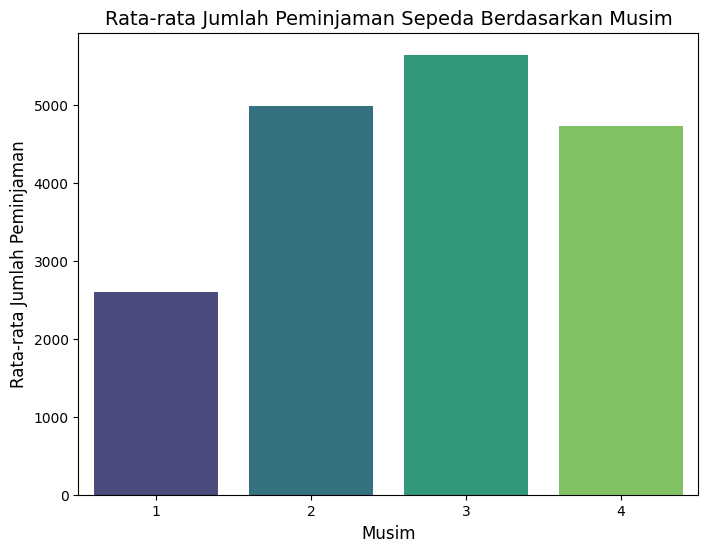

In [15]:
# Rata-rata peminjaman berdasarkan musim
season_avg = day_df.groupby('season')['cnt'].mean().sort_values()

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x=season_avg.index, y=season_avg.values, palette='viridis')
plt.title("Rata-rata Jumlah Peminjaman Sepeda Berdasarkan Musim", fontsize=14)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Rata-rata Jumlah Peminjaman", fontsize=12)
plt.show()

Analisis:
1:springer, 2:summer, 3:fall, 4:winter

Musim gugur (Fall) memiliki rata-rata peminjaman sepeda tertinggi.
Musim semi (springer) memiliki rata-rata peminjaman sepeda terendah.

Musim gugur (Fall) mungkin memiliki kondisi cuaca yang ideal untuk bersepeda. Pada musim ini, suhu cenderung nyaman (tidak terlalu panas seperti musim panas, dan tidak terlalu dingin seperti musim dingin), serta curah hujan biasanya lebih rendah dibandingkan musim semi. Kondisi ini mendorong lebih banyak orang untuk bersepeda, baik untuk keperluan rekreasi maupun komuter.

Musim semi (Spring), meskipun secara umum memiliki suhu yang juga nyaman, biasanya ditandai dengan curah hujan yang lebih tinggi di beberapa daerah. Cuaca yang lebih sering berubah-ubah atau basah dapat membuat orang kurang tertarik untuk menggunakan sepeda, sehingga menurunkan jumlah peminjaman.

**Jumlah Peminjaman Berdasarkan Kondisi Cuaca**

Akan dilihat pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda.

<ipython-input-16-43a5bf48b36a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_avg.index, y=weather_avg.values, palette='coolwarm')


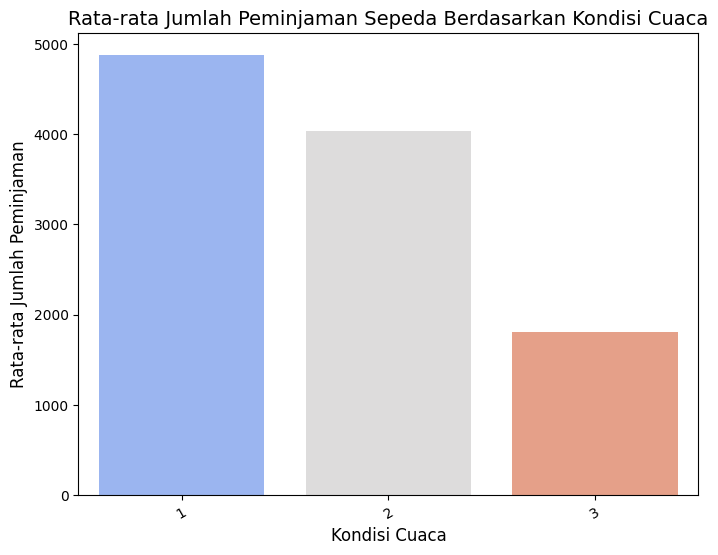

In [16]:
# Rata-rata peminjaman berdasarkan cuaca
weather_avg = day_df.groupby('weathersit')['cnt'].mean().sort_values()

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x=weather_avg.index, y=weather_avg.values, palette='coolwarm')
plt.title("Rata-rata Jumlah Peminjaman Sepeda Berdasarkan Kondisi Cuaca", fontsize=14)
plt.xlabel("Kondisi Cuaca", fontsize=12)
plt.ylabel("Rata-rata Jumlah Peminjaman", fontsize=12)
plt.xticks(rotation=30)
plt.show()


1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
3: Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar

Cuaca cerah atau sebagian berawan memiliki jumlah peminjaman tertinggi.
Cuaca salju/rain lebat menunjukkan jumlah peminjaman terendah, karena cuaca ekstrem memengaruhi aktivitas luar ruangan.

**Jumlah Peminjaman Berdasarkan Hari Kerja**

Analisis ini membandingkan jumlah peminjaman pada hari kerja (workingday) dengan hari libur.

<ipython-input-17-0529fc405347>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=workingday_avg.index, y=workingday_avg.values, palette='viridis')


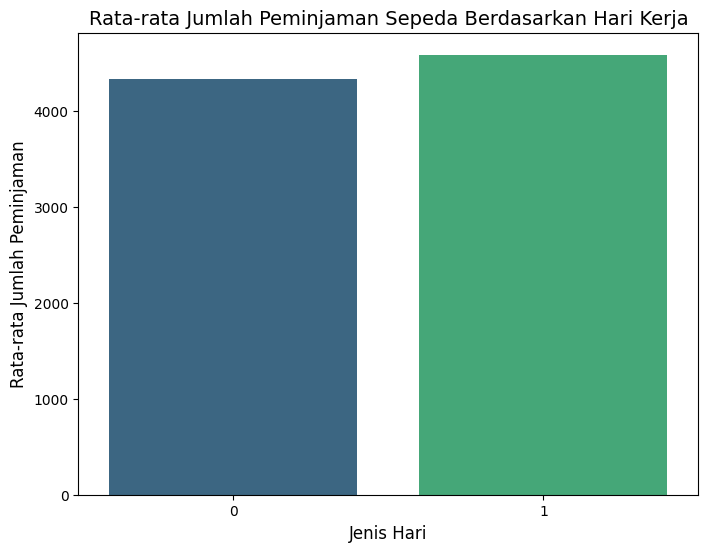

In [17]:
# Rata-rata peminjaman berdasarkan hari kerja
workingday_avg = day_df.groupby('workingday')['cnt'].mean()

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x=workingday_avg.index, y=workingday_avg.values, palette='viridis')
plt.title("Rata-rata Jumlah Peminjaman Sepeda Berdasarkan Hari Kerja", fontsize=14)
plt.xlabel("Jenis Hari", fontsize=12)
plt.ylabel("Rata-rata Jumlah Peminjaman", fontsize=12)
plt.show()

Jumlah peminjaman lebih tinggi pada hari kerja dibandingkan hari libur.
Pola ini menandakan bahwa sepeda lebih banyak dimanfaatkan sebagai alat transportasi produktif pada hari kerja, sedangkan pada hari libur, pemakaian sepeda cenderung lebih rendah karena aktivitas masyarakat bergeser ke kebutuhan rekreasional atau bersantai.

**Insight**

Faktor utama yang memengaruhi jumlah sepeda yang dipinjam setiap hari adalah:

***Musim***: Musim gugur (Fall) memiliki jumlah peminjaman tertinggi.

***Kondisi Cuaca***: Cuaca cerah atau sebagian berawan meningkatkan jumlah peminjaman, sedangkan salju/rain lebat menurunkannya.

***Hari Kerja***: Jumlah peminjaman lebih tinggi pada hari kerja dibandingkan hari libur.

***Suhu*** : Suhu memiliki korelasi positif kuat dengan peminjaman sepeda.

Korelasi dengan Variabel Lain
Gunakan heatmap untuk melihat hubungan antara variabel numerik dan jumlah peminjaman sepeda (cnt).

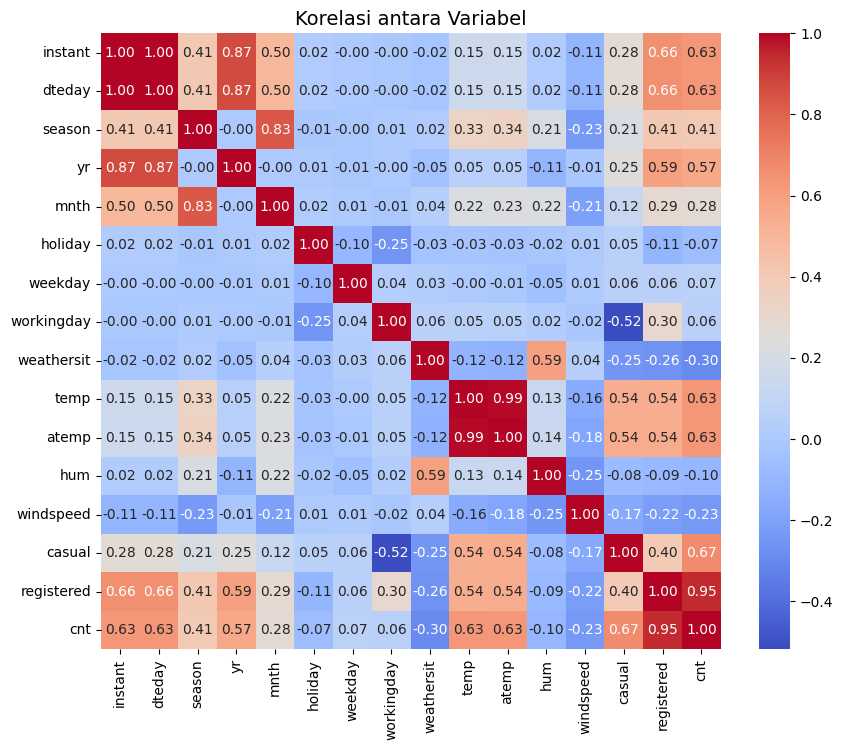

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(day_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi antara Variabel", fontsize=14)
plt.show()

Analisis:

1:springer, 2:summer, 3:fall, 4:winter

Suhu (temp) menunjukkan korelasi positif yang kuat dengan jumlah peminjaman (cnt).

Kelembapan (hum) dan kecepatan angin (windspeed) memiliki korelasi negatif lemah terhadap jumlah peminjaman (cnt).

### Bagaimana pola peminjaman sepeda berdasarkan waktu (jam, hari, atau musim)?

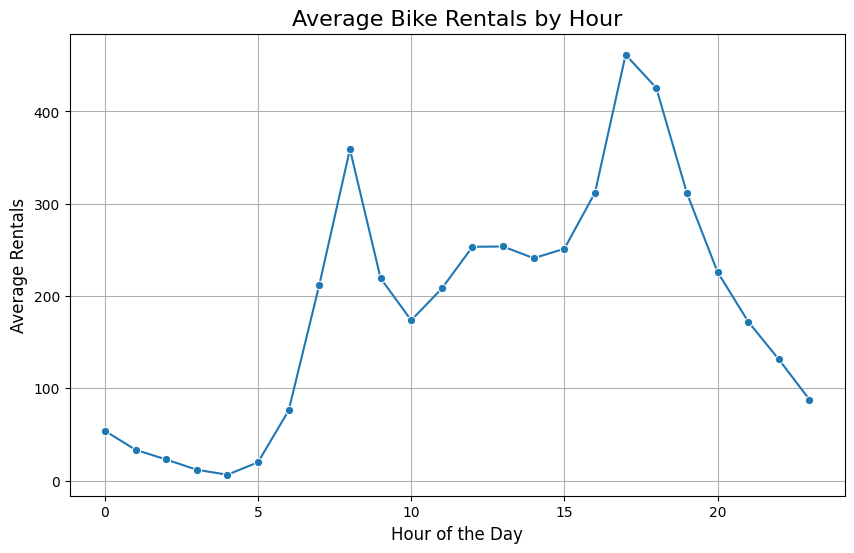

<ipython-input-19-5c0c733e3200>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_avg.index, y=weekday_avg.values, palette="viridis")


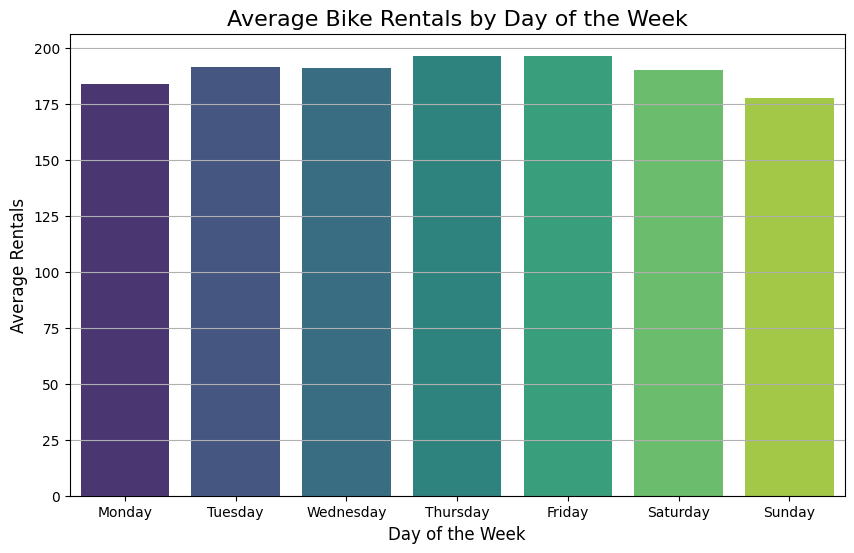

<ipython-input-19-5c0c733e3200>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_avg.index, y=season_avg.values, palette="coolwarm")


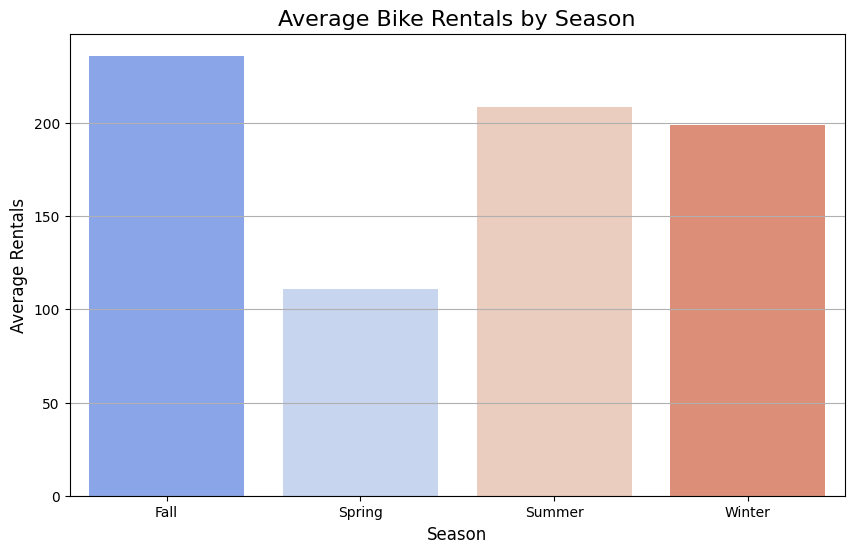

In [19]:
# Convert categorical data to readable formats
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
weekday_mapping = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}

hour_df["season"] = hour_df["season"].map(season_mapping)
hour_df["weekday"] = hour_df["weekday"].map(weekday_mapping)

# 1. Average rental by hour
hourly_avg = hour_df.groupby("hr")["cnt"].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker="o")
plt.title("Average Bike Rentals by Hour", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Average Rentals", fontsize=12)
plt.grid()
plt.show()

# 2. Average rental by weekday
weekday_avg = hour_df.groupby("weekday")["cnt"].mean().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_avg.index, y=weekday_avg.values, palette="viridis")
plt.title("Average Bike Rentals by Day of the Week", fontsize=16)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Average Rentals", fontsize=12)
plt.grid(axis="y")
plt.show()

# 3. Average rental by season
season_avg = hour_df.groupby("season")["cnt"].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=season_avg.index, y=season_avg.values, palette="coolwarm")
plt.title("Average Bike Rentals by Season", fontsize=16)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Average Rentals", fontsize=12)
plt.grid(axis="y")
plt.show()

Peminjaman Berdasarkan Jam (Hourly Trend):

Jam sibuk pagi (8-9 AM) dan sore (5-6 PM) menunjukkan lonjakan tajam jumlah peminjaman sepeda.
Tren ini menunjukkan bahwa sepeda sering digunakan untuk perjalanan kerja atau komuter.

Peminjaman Berdasarkan Hari dalam Seminggu (Weekly Trend):
Hari kerja (Monday–Friday) memiliki rata-rata peminjaman lebih tinggi dibandingkan akhir pekan.
Pola ini mendukung bahwa sepeda lebih banyak digunakan untuk keperluan produktivitas (seperti bekerja atau sekolah) dibandingkan rekreasi.

Peminjaman Berdasarkan Musim (Seasonal Trend):
Musim gugur (Fall) memiliki rata-rata peminjaman tertinggi, kemungkinan karena cuaca yang nyaman (tidak terlalu panas/dingin).
Musim semi (Spring) memiliki rata-rata terendah, yang mungkin disebabkan oleh cuaca yang masih cenderung tidak stabil.

**Insight:**
- Pola waktu menunjukkan bahwa jumlah peminjaman sepeda sangat dipengaruhi oleh aktivitas harian seperti perjalanan kerja.
- Pola mingguan mengindikasikan bahwa sepeda lebih sering digunakan pada hari kerja dibandingkan hari libur.
- Pola musiman mencerminkan bahwa cuaca dan musim berperan besar, dengan musim gugur menjadi waktu dengan permintaan tertinggi.

## Conclusion

- Apa faktor utama yang memengaruhi jumlah sepeda yang dipinjam setiap hari?

  Faktor utama yang memengaruhi jumlah sepeda yang dipinjam setiap hari adalah:
  
  Musim: Musim gugur (Fall) memiliki jumlah peminjaman tertinggi.

  Kondisi Cuaca: Cuaca cerah atau sebagian berawan meningkatkan jumlah peminjaman, sedangkan salju/rain lebat menurunkannya.

  Hari Kerja: Jumlah peminjaman lebih tinggi pada hari kerja dibandingkan hari libur.

  Suhu : Suhu memiliki korelasi positif kuat dengan peminjaman sepeda.

- Bagaimana pola peminjaman sepeda berdasarkan waktu (jam, hari, atau musim)?

  Pola waktu menunjukkan bahwa jumlah peminjaman sepeda sangat dipengaruhi oleh aktivitas harian seperti perjalanan kerja, berangkat sekolah, pulang kerja, pulang sekolah atau aktivitas yang dilakukan di pagi hari dan sore hari. Hal ini ditunjukkan dengan tajamnya lonjakan jumlah peminjaman sepeda pada jam sibuk pagi (8-9 AM) dan sore (5-6 PM).
  
  Pola mingguan mengindikasikan bahwa sepeda lebih sering digunakan pada hari kerja dibandingkan hari libur. Dapat dilihat bahwa Hari kerja (Monday–Friday) memiliki rata-rata peminjaman lebih tinggi dibandingkan akhir pekan. Pola ini mendukung bahwa sepeda lebih banyak digunakan untuk keperluan produktivitas (seperti bekerja atau sekolah).
  
  Pola musiman mencerminkan bahwa cuaca dan musim berperan besar, dengan musim gugur menjadi waktu dengan permintaan tertinggi.Musim gugur (Fall) memiliki rata-rata peminjaman tertinggi, kemungkinan karena cuaca yang nyaman (tidak terlalu panas/dingin). Musim semi (Spring) memiliki rata-rata terendah, yang mungkin disebabkan oleh cuaca yang masih cenderung tidak stabil.


In [20]:
all_df.to_csv("datamerge.csv", index=False)

In [21]:
!pip install streamlit babel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 2.6 MB/s eta 0:00:00


In [25]:
%%writefile app.py

import streamlit as st

st.write('Hello, *World!* :sunglasses:')

Overwriting app.py


In [23]:
!streamlit run app.py &>/content/logs.txt &

In [24]:
!npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦⠧⠇Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋^C
